In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\sumuk\AppData\Local\Temp\pip-install-p7ftrem6\tensorflow-gpu_762b9533ebb54e71828557c9a97ef6db\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [2]:
!pip install  tensorflow

In [3]:
import tensorflow as tf
import os

In [4]:
gpus=tf.config.list_logical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
import cv2
import imghdr

In [9]:
data_dir='data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
os.listdir(data_dir)

['happy', 'sad']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\2560px-Happy_People.jpg
Image not in ext list data\happy\56f455011e0000b300705475.jpeg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\Happy20People.jpg
Image not in ext list data\happy\portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in ext list data\happy\young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in ext list data\sad\2bnso9uiwlhrikrx.jpg
Image not in ext list data\sad\39843138-sad-man.jpg
Image not in ext list data\sad\african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data\sad\crying-sad.gif
Image not in ext list data\sad\depositphotos_41329389-stock-photo-sad-girl-on-the-windowsill.jpg
Image not in ext list data\sad\depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
Image not in ext list data\sad\depressed-man-studio-shot-260nw-404652526.jpg
Image not in ext list data\sad\portrait-sad-man-260nw-126009806.jp

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 142 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

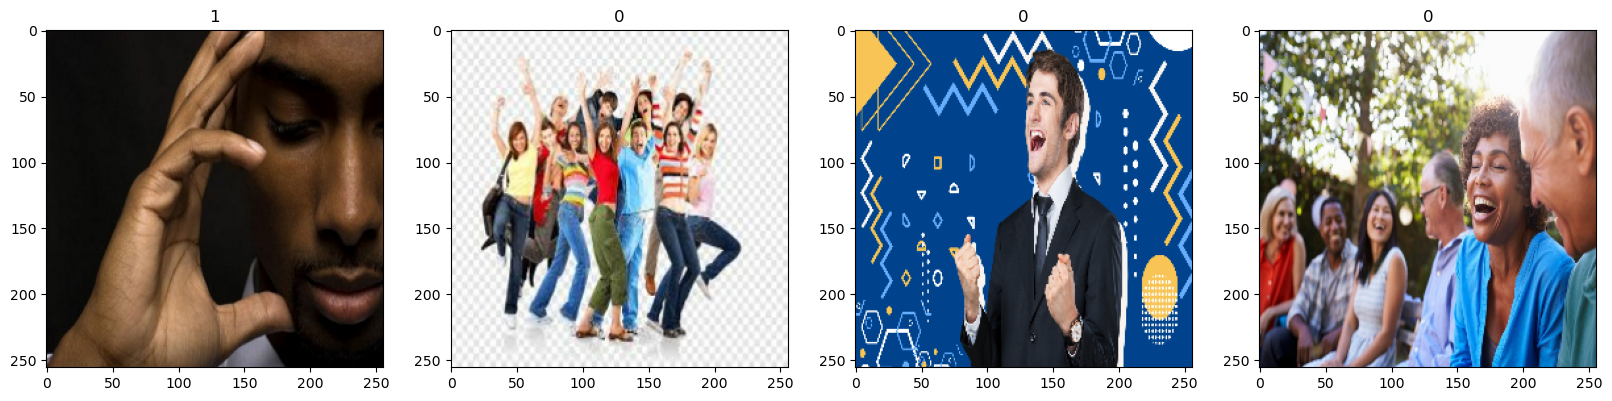

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [25]:
len(data)

5

In [26]:
train_size

3

In [27]:
val_size

1

In [28]:
test_size

1

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
len(train)

3

In [32]:
len(test)

1

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [38]:
logdir='logs'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 12s 3s/step - loss: 1.9088 - accuracy: 0.6458 - val_loss: 0.6746 - val_accuracy: 0.6562
Epoch 2/20
3/3 [==============================] - 11s 3s/step - loss: 0.7242 - accuracy: 0.4583 - val_loss: 0.6788 - val_accuracy: 0.6875
Epoch 3/20
3/3 [==============================] - 12s 4s/step - loss: 0.6392 - accuracy: 0.6771 - val_loss: 0.7427 - val_accuracy: 0.5312
Epoch 4/20
3/3 [==============================] - 11s 3s/step - loss: 0.5987 - accuracy: 0.6458 - val_loss: 0.5593 - val_accuracy: 0.6875
Epoch 5/20
3/3 [==============================] - 10s 3s/step - loss: 0.5485 - accuracy: 0.7188 - val_loss: 0.5007 - val_accuracy: 0.6875
Epoch 6/20
3/3 [==============================] - 10s 3s/step - loss: 0.4832 - accuracy: 0.7188 - val_loss: 0.4032 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 10s 3s/step - loss: 0.4317 - accuracy: 0.7396 - val_loss: 0.4728 - val_accuracy: 0.7812
Epoch 8/20
3/3 [==================

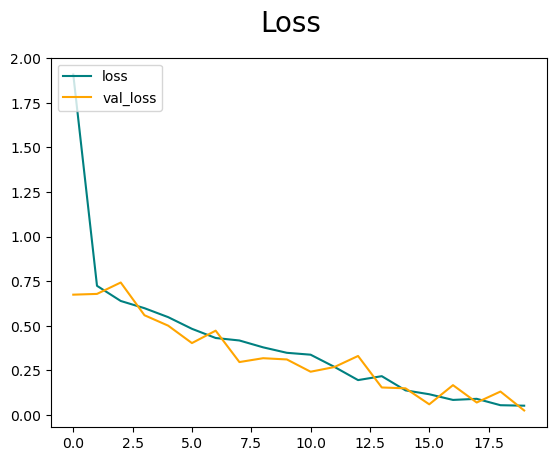

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

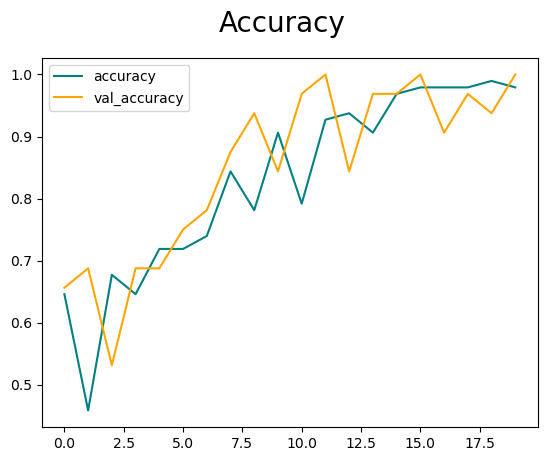

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 585ms/step


In [47]:
print(f'Presecion:{pre.result().numpy()}, Recall:{ re.result().numpy()}, Accuracy:{ acc.result().numpy()}')

Presecion:1.0, Recall:1.0, Accuracy:1.0


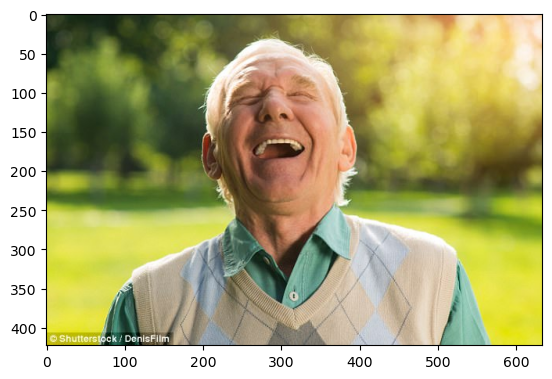

In [66]:
img = cv2.imread('Happy People.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

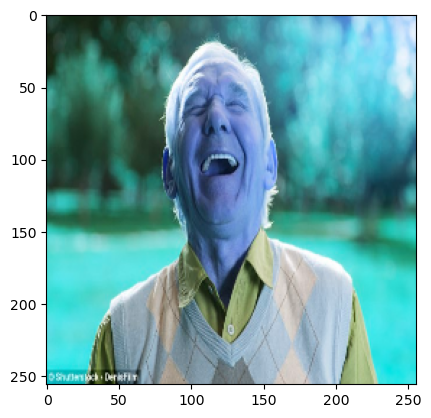

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 150ms/step


In [69]:
yhat

array([[0.01978914]], dtype=float32)

In [70]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save(os.path.join('models','imageclassifier.h5'))

In [75]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [76]:
new_model